# SPARK Data plotting exploration 

In [5]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
raw_data_dir = 'raw_data/pads-parkinsons-disease-smartwatch-dataset-1.0.0/'

In [19]:
data_files = pd.read_csv(raw_data_dir + 'preprocessed/file_list.csv')

In [266]:
data_files.head(10)

,resource_type,id,study_id,condition,disease_comment,age_at_diagnosis,age,height,weight,gender,handedness,appearance_in_kinship,appearance_in_first_grade_kinship,effect_of_alcohol_on_tremor,label,label_desc
0,patient,1,PADS,Healthy,-,56,56,173,78,male,right,True,True,Unknown,0,Healthy
1,patient,2,PADS,Other Movement Disorders,Left-Sided resting tremor and hypokinesia with...,69,81,193,104,male,right,False,NaN,No effect,2,Other Movement Disorder
2,patient,3,PADS,Healthy,-,45,45,170,78,female,right,False,NaN,Unknown,0,Healthy
3,patient,4,PADS,Parkinson's,IPS akinetic-rigid type,63,67,161,90,female,right,False,NaN,No effect,1,Parkinson's
4,patient,5,PADS,Parkinson's,IPS tremordominant type,65,75,172,86,male,left,False,NaN,Unknown,1,Parkinson's
5,patient,6,PADS,Parkinson's,IPS currently inpatient treatment for epilepsy...,60,72,171,115,female,right,False,False,Unknown,1,Parkinson's
6,patient,7,PADS,Other Movement Disorders,Atypical IPS,73,74,181,94,male,right,False,NaN,No effect,2,Other Movement Disorder
7,patient,8,PADS,Parkinson's,IPS mixed type,65,73,168,65,female,right,False,NaN,No effect,1,Parkinson's
8,patient,9,PADS,Parkinson's,IPS mixed type. THS. Essential Tremor,35,47,184,85,male,left,False,NaN,Unknown,1,Parkinson's
9,patient,10,PADS,Parkinson's,IPS hypokinetic-rigid type,47,56,187,77,male,right,False,NaN,Unknown,1,Parkinson's


<Axes: xlabel='label_desc', ylabel='Count'>

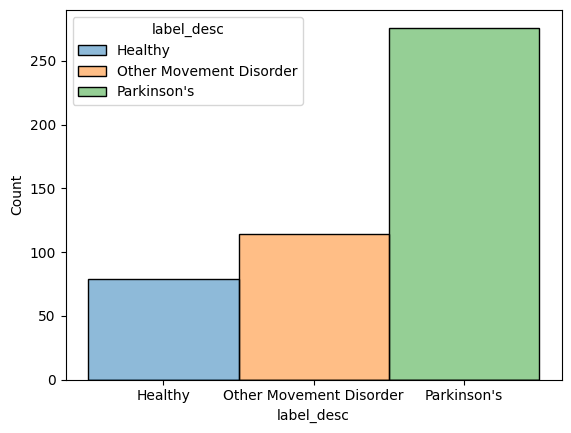

In [21]:
label_mapping = {0: "Healthy", 1: "Parkinson's", 2: "Other Movement Disorder"}
data_files['label_desc'] = data_files['label'].map(label_mapping)
sns.histplot(data = data_files, x = 'label_desc', legend = True, hue = 'label_desc')

<Axes: xlabel='appearance_in_kinship', ylabel='count'>

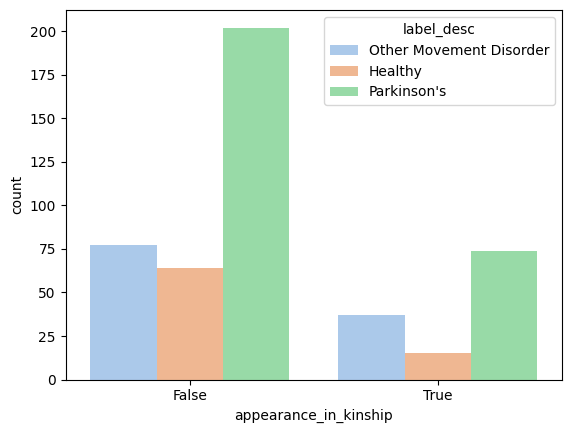

In [184]:
sns.countplot(data=data_files, x='appearance_in_kinship', hue='label_desc', palette="pastel")

<Axes: xlabel='age', ylabel='Count'>

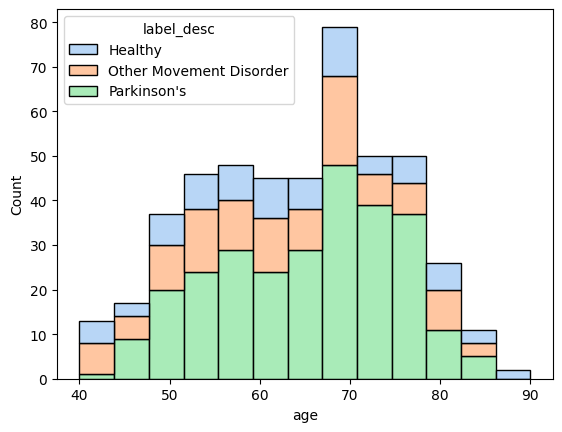

In [185]:
sns.histplot(data = data_files, x = 'age', hue = 'label_desc', multiple="stack", legend = True, palette="pastel")

In [186]:
data_summary = data_files.groupby(['label_desc'])['label'].aggregate(func = 'count')
data_summary_kinship = data_files.groupby(['label_desc','appearance_in_kinship'])['label'].aggregate(func = 'count')
data_summary_kinship = data_summary_kinship/data_summary.repeat(2).values

In [187]:
data_kinship_plot = data_summary_kinship.reset_index()
data_kinship_plot

,label_desc,appearance_in_kinship,label
0,Healthy,False,0.810127
1,Healthy,True,0.189873
2,Other Movement Disorder,False,0.675439
3,Other Movement Disorder,True,0.324561
4,Parkinson's,False,0.731884
5,Parkinson's,True,0.268116


<Axes: xlabel='label_desc', ylabel='label'>

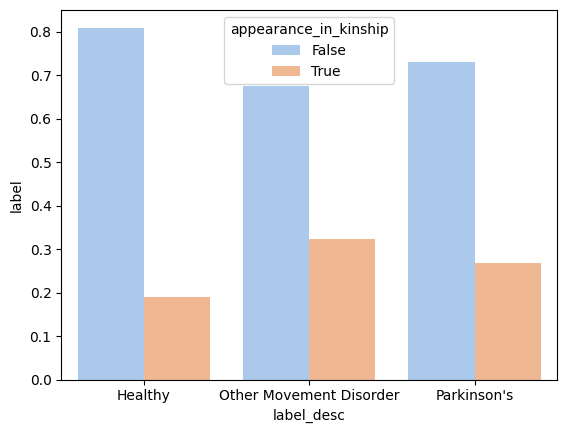

In [188]:
sns.barplot(data = data_kinship_plot, x = 'label_desc', y = 'label', hue = 'appearance_in_kinship', palette = 'pastel')

In [189]:
data_summary_gender = data_files.groupby(['label_desc','gender'])['label'].aggregate(func = 'count')
data_summary_gender = data_summary_gender/data_summary.repeat(2).values
data_gender_plot = data_summary_gender.reset_index()

<Axes: xlabel='label_desc', ylabel='label'>

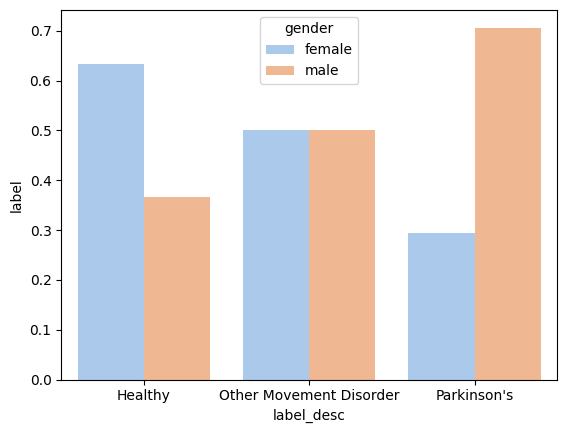

In [190]:
sns.barplot(data = data_gender_plot, x = 'label_desc', y = 'label', hue = 'gender', palette = 'pastel')

## Time series plots 

In [22]:
example_glas_drink_right = pd.read_csv(raw_data_dir + 'movement/timeseries/151_DrinkGlas_RightWrist.txt', header=None, index_col = 0)
example_glas_drink_left = pd.read_csv(raw_data_dir + 'movement/timeseries/151_DrinkGlas_LeftWrist.txt', header=None, index_col = 0)

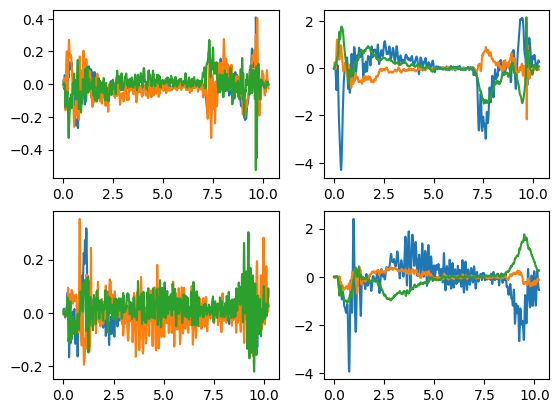

In [ ]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(example_glas_drink_right.iloc[:,:3])
ax[0, 1].plot(example_glas_drink_right.iloc[:,3:]) #row=1, col=0
ax[1, 0].plot(example_glas_drink_left.iloc[:,:3]) #row=0, col=1
ax[1, 1].plot(example_glas_drink_left.iloc[:,3:]) #row=0, col=1
plt.show()

In [24]:
data_files.loc[150,['id','label_desc']]

id                    151
label_desc    Parkinson's
Name: 150, dtype: object

In [25]:
ex_ent_right_pd = pd.read_csv(raw_data_dir + 'movement/timeseries/151_Entrainment_RightWrist.txt', header=None, index_col = 0)
ex_ent_left_pd = pd.read_csv(raw_data_dir + 'movement/timeseries/151_Entrainment_LeftWrist.txt', header=None, index_col = 0)

In [26]:
ex_ent_right_dd = pd.read_csv(raw_data_dir + 'movement/timeseries/007_Entrainment_RightWrist.txt', header=None, index_col = 0)
ex_ent_left_dd = pd.read_csv(raw_data_dir + 'movement/timeseries/007_Entrainment_LeftWrist.txt', header=None, index_col = 0)

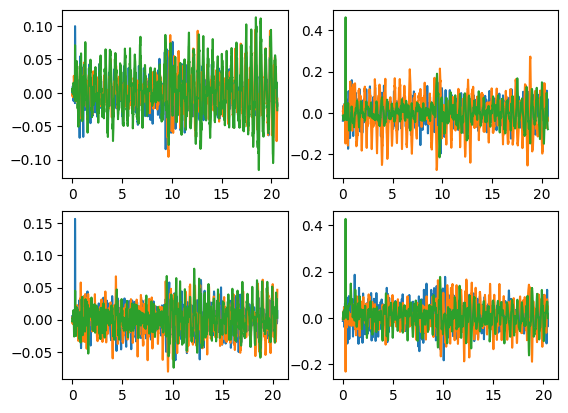

In [ ]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(ex_ent_right_pd.iloc[:,:3])
ax[0, 1].plot(ex_ent_right_pd.iloc[:, 3:]) #row=1, col=0
ax[1, 0].plot(ex_ent_left_pd.iloc[:,:3]) #row=0, col=1
ax[1, 1].plot(ex_ent_left_pd.iloc[:, 3:]) #row=0, col=1
plt.show()


In [32]:
data_files.loc[6,['id','label_desc']]

id                                  7
label_desc    Other Movement Disorder
Name: 6, dtype: object

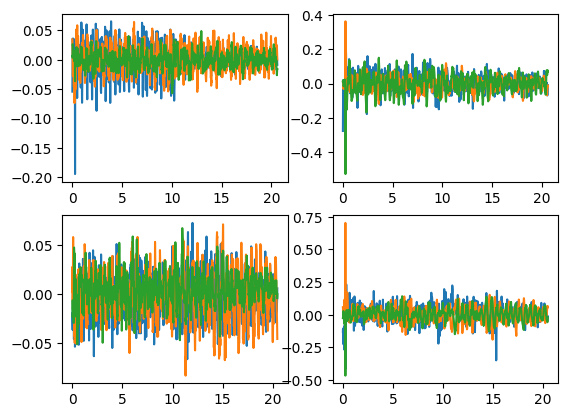

In [ ]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(ex_ent_right_dd.iloc[:,:3])
ax[0, 1].plot(ex_ent_right_dd.iloc[:, 3:]) #row=1, col=0
ax[1, 0].plot(ex_ent_left_dd.iloc[:,:3]) #row=0, col=1
ax[1, 1].plot(ex_ent_left_dd.iloc[:, 3:]) #row=0, col=1
plt.show()

In [34]:
ex_glass_drink_right_dd = pd.read_csv(raw_data_dir + 'movement/timeseries/007_DrinkGlas_RightWrist.txt', header=None, index_col = 0)
ex_glass_drink_left_dd = pd.read_csv(raw_data_dir + 'movement/timeseries/007_DrinkGlas_LeftWrist.txt', header=None, index_col = 0)

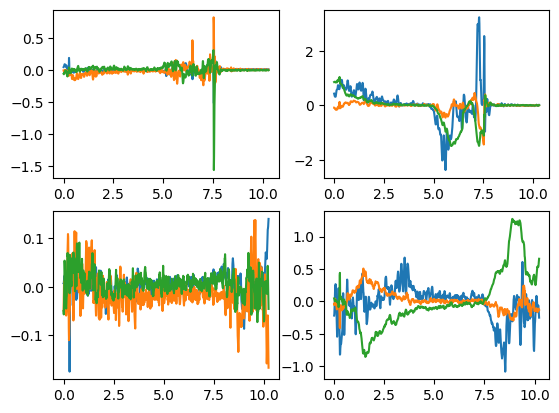

In [ ]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(ex_glass_drink_right_dd.iloc[:,:3])
ax[0, 1].plot(ex_glass_drink_right_dd.iloc[:, 3:]) #row=1, col=0
ax[1, 0].plot(ex_glass_drink_left_dd.iloc[:,:3]) #row=0, col=1
ax[1, 1].plot(ex_glass_drink_left_dd.iloc[:, 3:]) #row=0, col=1
plt.show()